In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler


In [9]:
df = pd.read_csv("C:/Users/ralph/OneDrive - The University of Nottingham/COMPUTER SCIENCE MSC/Machine Learning/Coursework/Assignment 2/TrainDataset2024.csv")
df.head()
# X = df.iloc[:, 3:]
print(df.shape)

# Remove missing values in outcome variables
    # pcr dataset
pcr = df.iloc[:, 1]
X_pcr = df[pcr.iloc[:] != 999]
pcr = pcr[pcr.iloc[:] != 999]
X_pcr = X_pcr.iloc[:, 3:]

    # rfs dataset
rfs = df.iloc[:, 2]
X_rfs = df[rfs.iloc[:] != 999]
rfs = rfs[rfs.iloc[:] != 999]
X_rfs = X_rfs.iloc[:, 3:]

print(pcr.shape)
print(rfs.shape)

(400, 121)
(395,)
(400,)


In [12]:
# Remove rows with missing target (value of 999)
# X.head()
print(X_pcr.shape)
# X_pcr.iloc[:32,:11]
# print(X.shape)

(395, 118)


## Remove Missing Values (Imputation/Remove Rows)

#### pCR


In [26]:
indices_to_remove = set()

for i in range(X_pcr.shape[1]):
    if X_pcr.iloc[:, i].dtype == np.int64:
        indices_to_remove.update(X_pcr[X_pcr.iloc[:, i] == 999].index)
    else:
        median = X_pcr.iloc[:, i].median()
        X_pcr.iloc[:, i] = X_pcr.iloc[:, i].replace(999, median)

# Remove duplicates from indices_to_remove
indices_to_remove = list(indices_to_remove)

# Remove the rows from X_pcr and pcr
X_pcr = X_pcr.drop(indices_to_remove)
pcr = pcr.drop(indices_to_remove)

print(X_pcr.shape)
print(pcr.shape)

(308, 118)
(308,)


#### RFS

In [13]:
indices_to_remove = set()

for i in range(X_rfs.shape[1]):
    if X_rfs.iloc[:, i].dtype == np.int64:
        indices_to_remove.update(X_rfs[X_rfs.iloc[:, i] == 999].index)
    else:
        median = X_rfs.iloc[:, i].median()
        X_rfs.iloc[:, i] = X_rfs.iloc[:, i].replace(999, median)

# Remove duplicates from indices_to_remove
indices_to_remove = list(indices_to_remove)

# Remove the rows from X_rfs and rfs
X_rfs = X_rfs.drop(indices_to_remove)
rfs = rfs.drop(indices_to_remove)

print(X_rfs.shape)
print(rfs.shape)

(310, 118)
(310,)


In [8]:
# Check for remainding 999 values anywhere in both datasets
print(X_pcr[X_pcr == 999].count().sum())
print(X_rfs[X_rfs == 999].count().sum())

97
0


### Checking for Outliers in RFS data

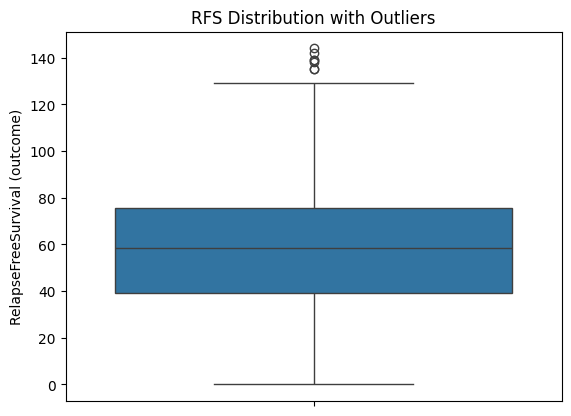

In [10]:
sns.boxplot(rfs)
plt.title("RFS Distribution with Outliers")
plt.show()

## No major outliers in the dataset

## LASSO Regression

#### pCR

In [296]:
### LASSO regression ###
X_scaled_pcr = StandardScaler().fit_transform(X_pcr)

X_train, X_val, y_train, y_val = train_test_split(X_scaled_pcr, pcr, test_size=0.2, random_state=42)
model = Lasso(alpha=0.01) #TODO: Nested Validation Loop
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f"MSE: {mean_squared_error(y_val, y_pred)}")

# Print the features with non-zero coefficients
print(f"LASSO Selected {X_pcr.columns[model.coef_ != 0].shape[0]} features:")

# Create LASSO selected datafram
X_pcr_lasso = X_pcr[X_pcr.columns[model.coef_ != 0]]

# print column names of selected features
format = [", ", ", ", ", ", ", ", ",\n"]
for column in range(X_pcr_lasso.columns.shape[0]):
    print(X_pcr_lasso.columns[column], end=format[column % 5])


MSE: 0.10232535342015521
LASSO Selected 21 features:
ER, PgR, HER2, TrippleNegative, Proliferation,
HistologyType, LNStatus, TumourStage, Gene, original_shape_Sphericity,
original_shape_SurfaceVolumeRatio, original_firstorder_Variance, original_glcm_Imc1, original_gldm_DependenceNonUniformity, original_gldm_LargeDependenceHighGrayLevelEmphasis,
original_glszm_GrayLevelNonUniformity, original_glszm_LargeAreaEmphasis, original_glszm_LargeAreaHighGrayLevelEmphasis, original_glszm_SmallAreaLowGrayLevelEmphasis, original_ngtdm_Busyness,
original_ngtdm_Strength, 

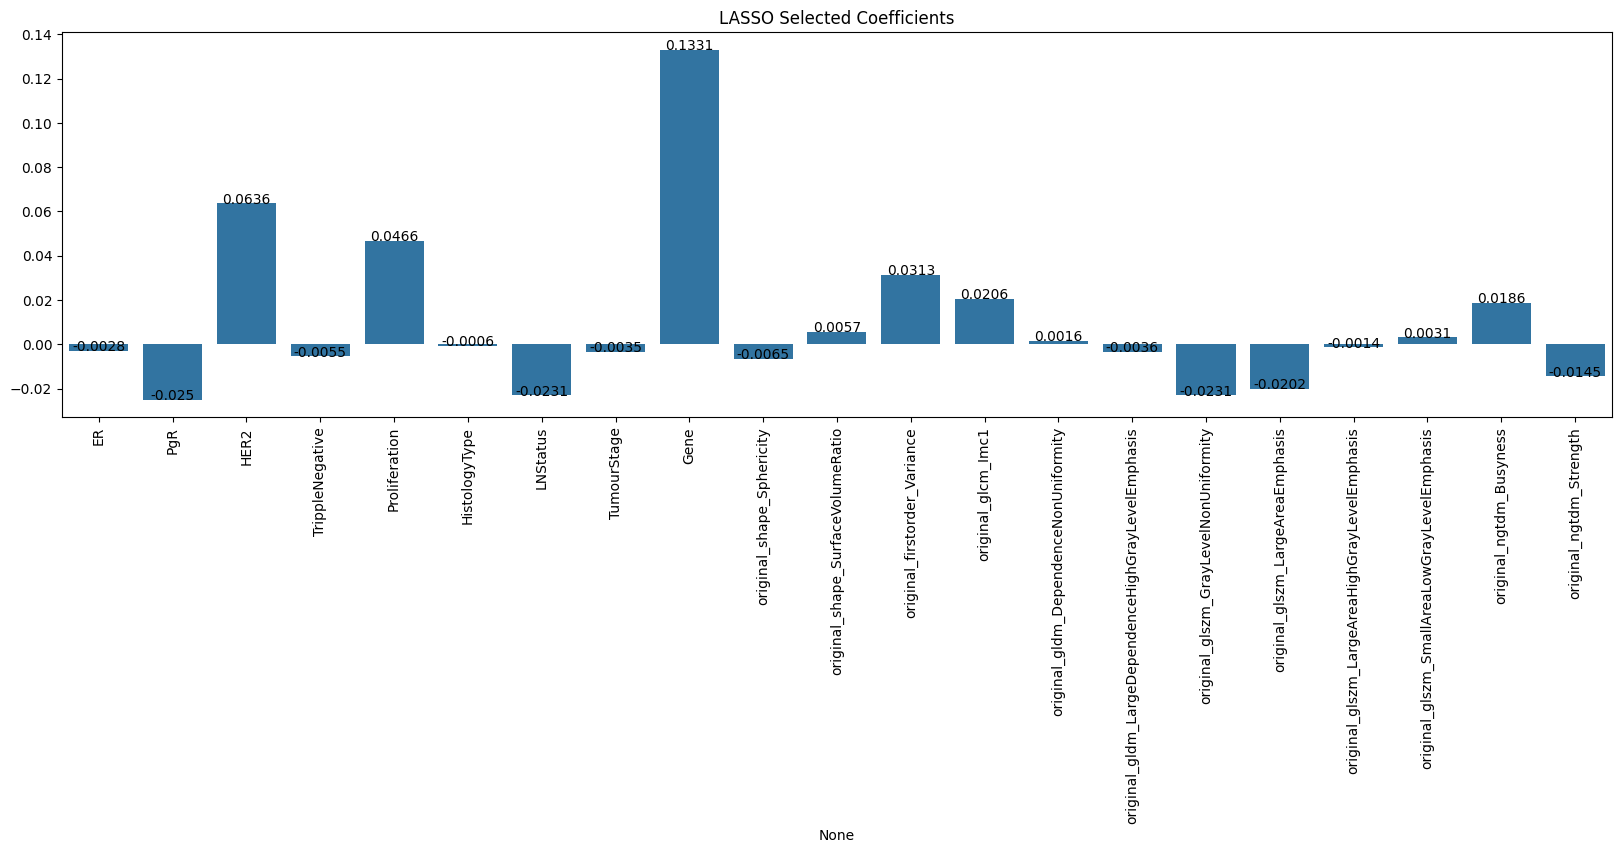

In [297]:
### Create Barplot of LASSO coefficients ###

plt.figure(figsize=(20, 5))
sns.barplot(x=X_pcr_lasso.columns, y=model.coef_[model.coef_ != 0])

plt.title("LASSO Selected Coefficients")
# Label each bar with their value
for bar, height in enumerate(model.coef_[model.coef_ != 0]):
    plt.text(bar, height, round(height, 4), ha="center")

plt.xticks(rotation=90)
plt.show()

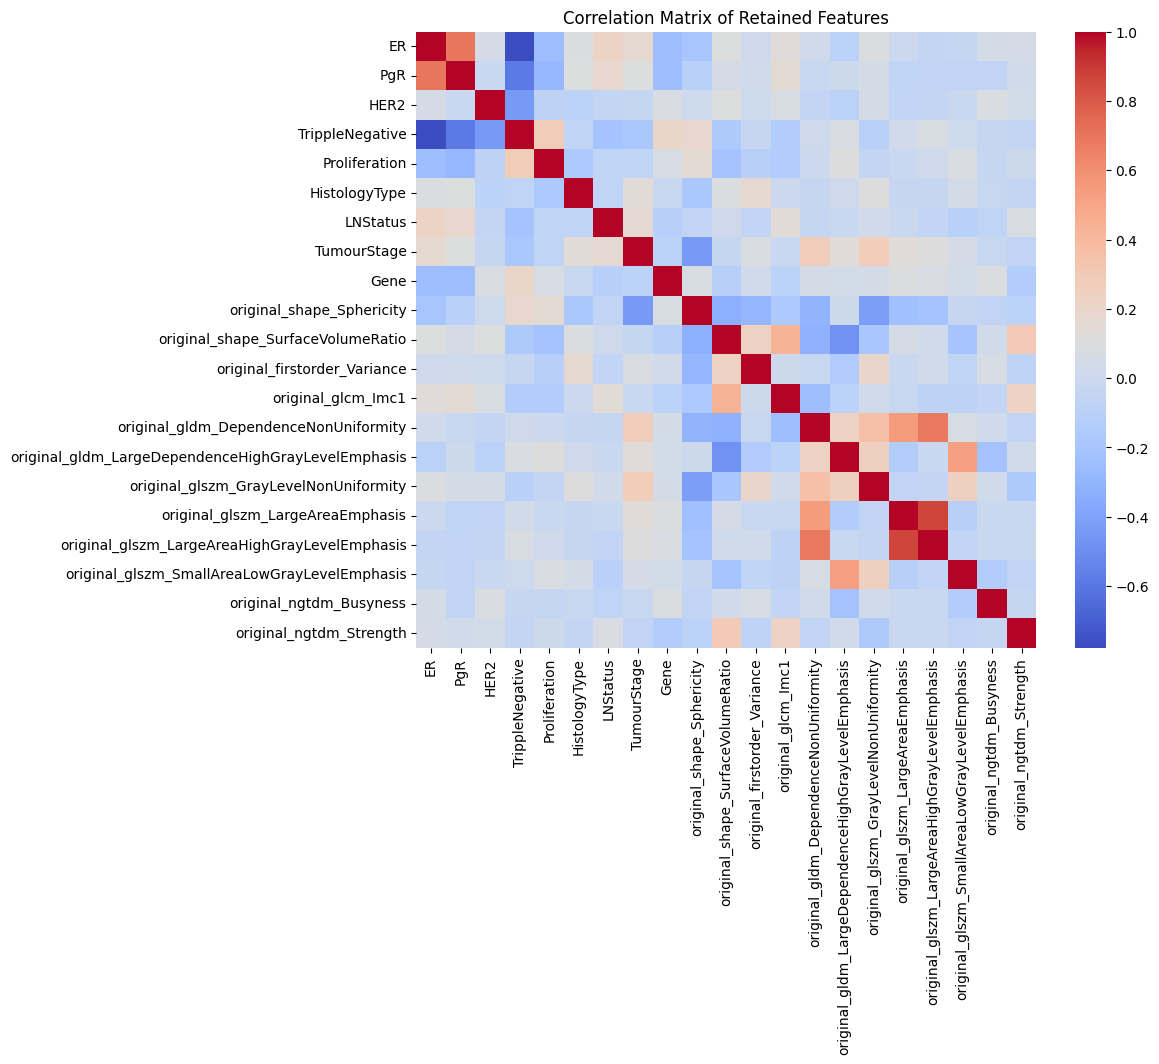

In [298]:
### Create Correlation Matrix  ###

# Select the features with non-zero coefficients
correlation_matrix = X_pcr_lasso.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", )
plt.title("Correlation Matrix of Retained Features")
plt.show()

# Correlation matrix can show us if LASSO removed highly correlated (and therefore redundant) features

#### RFS

In [11]:
### LASSO regression ###
X_scaled_rfs = StandardScaler().fit_transform(X_rfs)

X_train, X_val, y_train, y_val = train_test_split(X_scaled_rfs, rfs, test_size=0.2, random_state=42)
model = Lasso(alpha=0.1) #TODO: Nested Validation Loop
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f"MSE: {mean_squared_error(y_val, y_pred)}")

# Print the features with non-zero coefficients
print(f"LASSO Selected {X_rfs.columns[model.coef_ != 0].shape[0]} features:")

# Create LASSO selected datafram
X_rfs_lasso = X_rfs[X_rfs.columns[model.coef_ != 0]]

# print column names of selected features
format = [", ", ", ", ", ", ", ", ",\n"]
for column in range(X_rfs_lasso.columns.shape[0]):
    print(X_rfs_lasso.columns[column], end=format[column % 5])


MSE: 932.8822118403197
LASSO Selected 54 features:
Age, PgR, HER2, TrippleNegative, ChemoGrade,
Proliferation, HistologyType, LNStatus, TumourStage, Gene,
original_shape_Elongation, original_shape_Flatness, original_shape_MajorAxisLength, original_shape_Maximum2DDiameterColumn, original_shape_Maximum2DDiameterRow,
original_shape_Maximum2DDiameterSlice, original_shape_Sphericity, original_firstorder_10Percentile, original_firstorder_InterquartileRange, original_firstorder_Kurtosis,
original_firstorder_Maximum, original_firstorder_MeanAbsoluteDeviation, original_firstorder_Median, original_firstorder_Minimum, original_firstorder_RobustMeanAbsoluteDeviation,
original_firstorder_Skewness, original_firstorder_Uniformity, original_firstorder_Variance, original_glcm_ClusterShade, original_glcm_ClusterTendency,
original_glcm_DifferenceEntropy, original_glcm_Imc2, original_gldm_DependenceNonUniformity, original_gldm_DependenceVariance, original_gldm_LargeDependenceEmphasis,
original_glrlm_GrayL

c:\Users\ralph\Desktop\Virtual Environments\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.322e+02, tolerance: 2.022e+01
  model = cd_fast.enet_coordinate_descent(


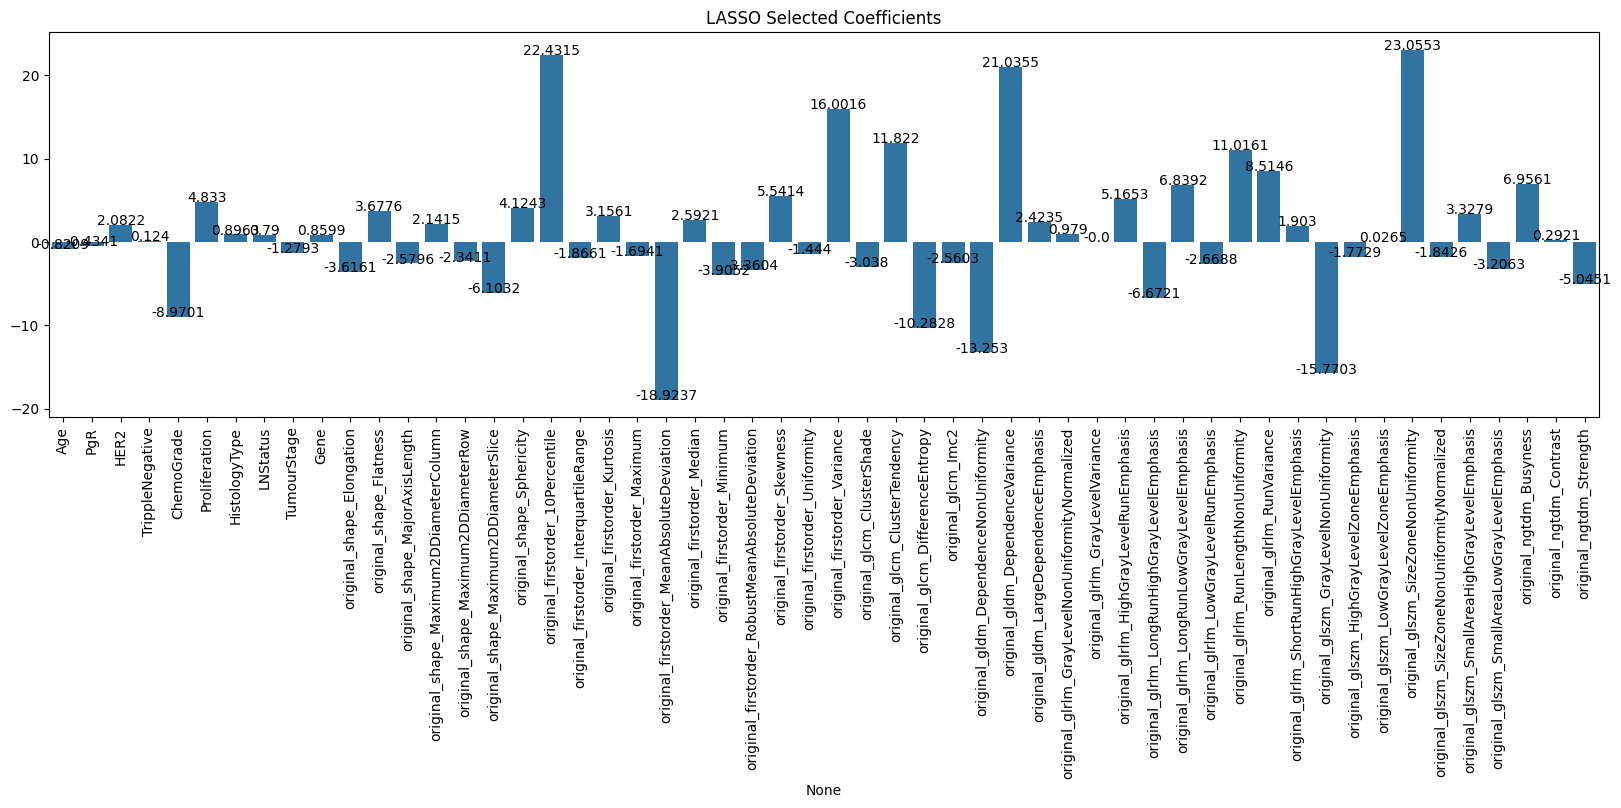

In [300]:
### Create Barplot of LASSO coefficients ###

plt.figure(figsize=(20, 5))
sns.barplot(x=X_rfs_lasso.columns, y=model.coef_[model.coef_ != 0])

plt.title("LASSO Selected Coefficients")
# Label each bar with their value
for bar, height in enumerate(model.coef_[model.coef_ != 0]):
    plt.text(bar, height, round(height, 4), ha="center")

plt.xticks(rotation=90)
plt.show()

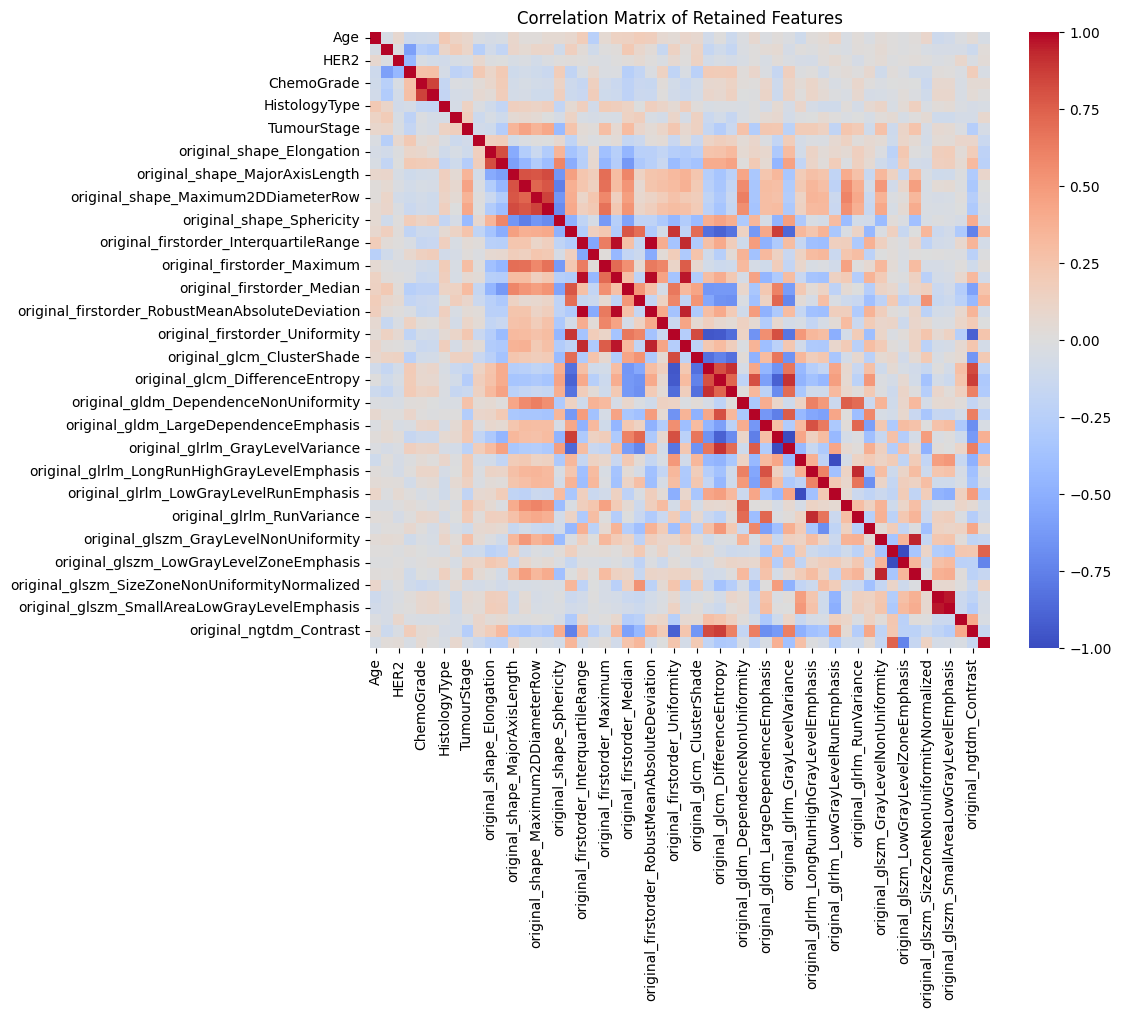

In [301]:
### Create Correlation Matrix  ###

# Select the features with non-zero coefficients
correlation_matrix = X_rfs_lasso.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", )
plt.title("Correlation Matrix of Retained Features")
plt.show()

# Correlation matrix can show us if LASSO removed highly correlated (and therefore redundant) features

## Perform Linear Regression with the Selected Features

#### pCR

In [302]:
# Perform linear regression using LASSO selected features

X_pcr_lasso_scaled = StandardScaler().fit_transform(X_pcr_lasso)

X_train, X_val, y_train, y_val = train_test_split(X_pcr_lasso_scaled, pcr, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f"MSE: {mean_squared_error(y_val, y_pred)}")


MSE: 0.11576802411269344


#### RFS

In [303]:
# Perform linear regression using LASSO selected features

X_rfs_lasso_scaled = StandardScaler().fit_transform(X_rfs_lasso)

X_train, X_val, y_train, y_val = train_test_split(X_rfs_lasso_scaled, rfs, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(f"MSE: {mean_squared_error(y_val, y_pred)}")


MSE: 959.0182264654511


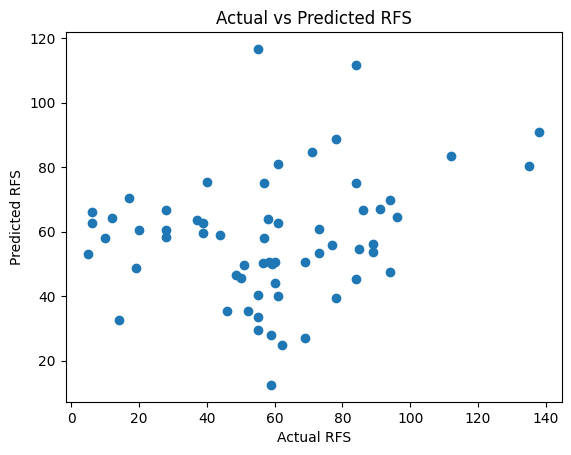

In [304]:
plt.scatter(y_val, y_pred)
plt.xlabel("Actual RFS")
plt.ylabel("Predicted RFS")
plt.title("Actual vs Predicted RFS")
plt.show()

## Perform Logistic Regression on pCR (EXTRA)

In [305]:
# Logistic Regression on Entire Dataset
X_train, X_val, y_train, y_val = train_test_split(X_scaled_pcr, pcr, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8064516129032258


In [306]:
# Logistic Regression on LASSO selected features
X_train, X_val, y_train, y_val = train_test_split(X_pcr_lasso_scaled, pcr, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8225806451612904


## Nested Cross Validation

In [ ]:
# Nested K-fold Cross Validation for hyperparameter tuning using LASSO
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


kf = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = np.linspace(0.1, 1, 10)
scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    score = cross_val_score(model, X_scaled, pcr, cv=kf, scoring='neg_mean_squared_error')
    scores.append(-score.mean())

for score in scores:
    print(f"{score:.2f}")

In [ ]:
outlier_indices = set()
for column in X.columns:
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR

    outliers = X[(X[column] < lower_bound) | (X[column] > upper_bound)].index
    outlier_indices.update(outliers)

    outliers_sum = ((X[column] < lower_bound) | (X[column] > upper_bound)).sum()
print(f'{column}: {outliers_sum} outliers')

outlier_indices = list(outlier_indices)

X = X.drop(index=outlier_indices)
rfs = rfs.drop(index=outlier_indices)
pcr = pcr.drop(index=outlier_indices)

In [ ]:
fig = plt.figure(figsize=(30, 30))
for i in range(40):
    plt.subplot(9, 6, i+1)
    plt.scatter(X.iloc[:, i], rfs)
    plt.xlabel(X.columns[i])
    # plt.ylabel('rfs')

In [ ]:
X.shape